In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fpaths = "./testes_seq_paral/test_staub/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8]
speedups = []

In [3]:
sequenciais = []

for i in sizes:
    print(i)
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "Tempo sequencial" in linha:
                aux = linha.split(":")
                aux = aux[1].split("sec")
                aux = aux[0]
                print(float(aux))
                sequencial_local.append(float(aux))
    sequenciais.append(np.mean(sequencial_local))

small
189.583693
188.163239
188.6256
188.354742
188.206401
medium
367.476026
367.430401
367.453538
367.467439
367.440407
large
635.175533
635.105899
635.147105
635.02239
634.939008


In [8]:
paralelos = []

for i in sizes:
    paralelo_local = []
    for j in threads:
        print(f"{i} threads {j}")
        # with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                # if "Tempo paralelo" in linha:
                if "Tempo mpi" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        paralelos.append(np.mean(paralelo_local))

small threads 2
94.484715
102.987328
107.93899
107.015204
107.204625
small threads 4
70.264464
69.996163
72.346892
79.261932
79.176256
small threads 8
79.108229
78.994391
78.972879
79.101469
78.990874
medium threads 2
311.583376
308.821105
308.826079
310.403872
308.04313
medium threads 4
210.455892
210.100725
209.941724
209.910764
210.052155
medium threads 8
211.203061
209.581451
209.849209
209.551453
209.393386
large threads 2
643.320264
642.263558
596.174494
643.122632
612.062222
large threads 4
436.576598
436.181786
436.94563
437.289486
436.788924
large threads 8
437.417466
436.924853
436.473574
436.476722
436.853077


In [9]:
sequenciais

[188.586735, 367.4535622, 635.0779869999999]

In [10]:
paralelos

[103.9261724,
 89.0676569,
 85.72296073333332,
 309.53551239999996,
 259.8138822,
 243.18115880000005,
 627.388634,
 532.0725594,
 500.3247524]

In [11]:
speedups = []

speedup_local = [sequenciais[0] / paralelos[i] for i in range(0,3)] 
speedups.append(speedup_local)
speedup_local = [sequenciais[1] / paralelos[i] for i in range(3,6)] 
speedups.append(speedup_local)
speedup_local = [sequenciais[2] / paralelos[i] for i in range(6,9)]
speedups.append(speedup_local)

In [12]:
speedups

[[1.814622155756407, 2.117342496297329, 2.1999559206389865],
 [1.1871127785982598, 1.4142953374490626, 1.5110280912108227],
 [1.0122561241681658, 1.193592820716324, 1.269331537073879]]

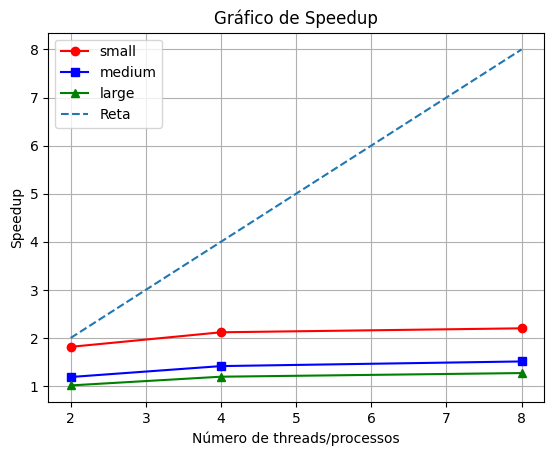

In [14]:
plt.plot(threads, speedups[0], label='small', color='red', marker='o')
plt.plot(threads, speedups[1], label='medium', color='blue', marker='s')
plt.plot(threads, speedups[2], label='large', color='green', marker='^')

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup')
plt.grid(True)
plt.legend()
plt.show()